In [15]:
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Add the correct relative path to the scripts folder
sys.path.append(os.path.abspath('../scripts'))
sys.path.append(os.path.abspath('../src'))

In [2]:
import cleaned_data_from_db

Connected to PostgreSQL database!
      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0   241538.0  2.082014e+14   3.366496e+10  3.552121e+13   
1   241538.0  2.082019e+14   3.368185e+10  3.579401e+13   
2   241538.0  2.082003e+14   3.376063e+10  3.528151e+13   
3   241538.0  2.082014e+14   3.375034e+10  3.535661e+13   
4   241538.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...         

In [3]:
df = cleaned_data_from_db.df

In [4]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0000,4/25/2019 14:35,662.00000,241538.000000,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,3.674974e+07,3.088796e+08
1,1.311448e+19,4/9/2019 13:04,235.0000,4/25/2019 8:15,606.00000,241538.000000,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,5.380039e+07,6.533850e+08
2,1.311448e+19,4/9/2019 17:42,1.0000,4/25/2019 11:58,652.00000,241538.000000,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,2.788364e+07,2.798073e+08
3,1.311448e+19,4/10/2019 0:31,486.0000,4/25/2019 7:36,171.00000,241538.000000,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,4.332422e+07,8.460285e+08
4,1.311448e+19,4/12/2019 20:10,565.0000,4/25/2019 10:40,954.00000,241538.000000,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,3.854281e+07,5.691386e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0000,4/30/2019 6:02,214.00000,81230.000000,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,5.762885e+07,5.741753e+08
149997,7.349883e+18,4/29/2019 7:28,483.0000,4/30/2019 10:41,187.00000,97970.000000,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,3.913508e+07,6.666488e+08
149998,1.311448e+19,4/29/2019 7:28,283.0000,4/30/2019 10:46,810.00000,98249.000000,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,3.491222e+07,5.927864e+08
149999,1.311448e+19,4/29/2019 7:28,696.0000,4/30/2019 10:40,327.00000,97910.000000,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,2.962610e+07,3.718959e+08


In [6]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [7]:
df['TCP_Retransmission'] = df['TCP DL Retrans. Vol (Bytes)'] + df['TCP DL Retrans. Vol (Bytes)']
df['RTT'] = df['Avg RTT DL (ms)'] + df['Avg RTT UL (ms)']
df['Throughput'] = df['Avg Bearer TP DL (kbps)'] + df['Avg Bearer TP UL (kbps)']


In [8]:
# Aggregating the metrics per user
aggregated_data = df.groupby('MSISDN/Number').agg({
    'TCP_Retransmission': 'mean',
    'RTT': 'mean',
    'Throughput': 'mean'
}).reset_index()

# Display the aggregated data
print(aggregated_data)

        MSISDN/Number  TCP_Retransmission         RTT    Throughput
0        3.360100e+10        1.137460e+06   60.331977     76.000000
1        3.360100e+10        1.137460e+06   31.000000     99.000000
2        3.360100e+10        1.137460e+06  127.458589     97.000000
3        3.360101e+10        2.132000e+03   84.000000    248.000000
4        3.360101e+10        9.918360e+06   66.665988  25496.000000
...               ...                 ...         ...           ...
106850   3.378998e+10        5.688680e+05   98.229294  33937.500000
106851   3.379000e+10        4.300880e+05   52.000000  10365.000000
106852   3.379000e+10        1.137460e+06   40.000000    116.000000
106853   4.188282e+10        6.222656e+06  152.671824  16253.501588
106854   3.197021e+12        1.137460e+06  127.458589   1411.952463

[106855 rows x 4 columns]


In [9]:
# Top 10 Users with highest TCP retransmission, RTT, and Throughput
top_10_tcp = df[['MSISDN/Number', 'TCP_Retransmission']].sort_values(by='TCP_Retransmission', ascending=False).head(10)
top_10_rtt = df[['MSISDN/Number', 'RTT']].sort_values(by='RTT', ascending=False).head(10)
top_10_throughput = df[['MSISDN/Number', 'Throughput']].sort_values(by='Throughput', ascending=False).head(10)

# Bottom 10 Users with lowest TCP retransmission, RTT, and Throughput
bottom_10_tcp = df[['MSISDN/Number', 'TCP_Retransmission']].sort_values(by='TCP_Retransmission', ascending=True).head(10)
bottom_10_rtt = df[['MSISDN/Number', 'RTT']].sort_values(by='RTT', ascending=True).head(10)
bottom_10_throughput = df[['MSISDN/Number', 'Throughput']].sort_values(by='Throughput', ascending=True).head(10)

# Most frequent TCP retransmission, RTT, and Throughput values
most_frequent_tcp = df['TCP_Retransmission'].mode()[0]
most_frequent_rtt = df['RTT'].mode()[0]
most_frequent_throughput = df['Throughput'].mode()[0]

# Display the results
print("Top 10 Users by TCP Retransmission:\n", top_10_tcp)
print("\nTop 10 Users by RTT:\n", top_10_rtt)
print("\nTop 10 Users by Throughput:\n", top_10_throughput)

print("\nMost Frequent TCP Retransmission:", most_frequent_tcp)
print("\nMost Frequent RTT:", most_frequent_rtt)
print("\nMost Frequent Throughput:", most_frequent_throughput)


Top 10 Users by TCP Retransmission:
         MSISDN/Number  TCP_Retransmission
143056   3.376217e+10         721784646.0
59083    3.376376e+10         719845096.0
20069    3.366519e+10         706412334.0
67064    3.366815e+10         702881918.0
120640   3.366168e+10         698205134.0
87538    3.365849e+10         696124178.0
59790    3.366854e+10         692647906.0
16493    3.366714e+10         690682916.0
122402   3.365011e+10         689641850.0
147862   3.365940e+10         687253812.0

Top 10 Users by RTT:
         MSISDN/Number     RTT
114580   3.365822e+10  1907.0
7252     3.365946e+10  1863.0
22410    3.361062e+10  1805.0
92462    3.378181e+10  1798.0
17862    3.365096e+10  1794.0
13640    3.366755e+10  1792.0
138828   3.363372e+10  1787.0
112079   3.365012e+10  1783.0
137361   3.369857e+10  1783.0
96423    3.365952e+10  1778.0

Top 10 Users by Throughput:
         MSISDN/Number  Throughput
137088   3.366076e+10    100213.0
36067    3.376078e+10     99279.0
7241     3.36477

In [10]:
# Compute average TCP retransmission, RTT, and Throughput per Handset Type
handset_analysis = df.groupby('Handset Type').agg({
    'TCP_Retransmission': 'mean',
    'RTT': 'mean',
    'Throughput': 'mean'
}).reset_index()

# Display the analysis
print(handset_analysis)


                                           Handset Type  TCP_Retransmission  \
0                            A-Link Telecom I. Cubot A5        1.137460e+06   
1                     A-Link Telecom I. Cubot Note Plus        1.204698e+06   
2                        A-Link Telecom I. Cubot Note S        8.268896e+07   
3                          A-Link Telecom I. Cubot Nova        2.716800e+05   
4                         A-Link Telecom I. Cubot Power        1.559800e+04   
...                                                 ...                 ...   
1391  Zte Zte Blade C2 Smartphone Android By Sfr Sta...        5.713900e+05   
1392                          Zyxel Communicat. Lte7460        4.768606e+07   
1393                          Zyxel Communicat. Sbg3600        1.004017e+08   
1394                    Zyxel Communicat. Zyxel Wah7706        2.320000e+02   
1395                                          undefined        2.554087e+06   

              RTT   Throughput  
0       42.000000 

In [12]:
# Selecting the experience metrics for clustering
X = df[['TCP_Retransmission', 'RTT', 'Throughput']]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:


# Applying K-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df['Experience_Cluster'] = kmeans.fit_predict(X_scaled)

# Display the clustering results
print(df[['MSISDN/Number', 'TCP_Retransmission', 'RTT', 'Throughput', 'Experience_Cluster']])


        MSISDN/Number  TCP_Retransmission         RTT    Throughput  \
0        3.366496e+10           1137460.0   47.000000     67.000000   
1        3.368185e+10           1137460.0   70.000000     42.000000   
2        3.376063e+10           1137460.0  127.458589     15.000000   
3        3.375034e+10           1137460.0  127.458589     88.000000   
4        3.369980e+10           1137460.0  127.458589     15.000000   
...               ...                 ...         ...           ...   
149996   3.365069e+10           1137460.0   46.331977    117.000000   
149997   3.366345e+10           1137460.0   29.000000     77.000000   
149998   3.362189e+10           1137460.0   49.000000     90.000000   
149999   3.361962e+10           1137460.0   42.000000     71.000000   
150000   4.188282e+10           1137460.0  127.458589  15070.474573   

        Experience_Cluster  
0                        0  
1                        0  
2                        0  
3                        0  
4 

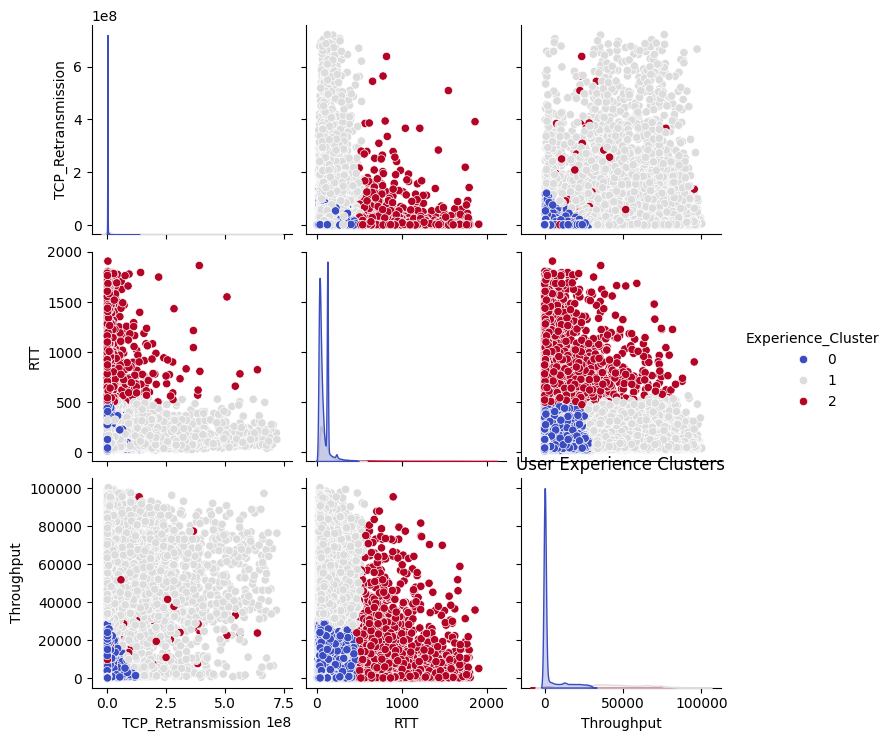

In [16]:


# Visualizing the clusters in a pair plot
sns.pairplot(df, hue='Experience_Cluster', vars=['TCP_Retransmission', 'RTT', 'Throughput'], palette='coolwarm')
plt.title('User Experience Clusters')
plt.show()
